In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/BELL_GRAHAM_FILTERDATA'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/BELL_GRAHAM_FILTERDATA/train.csv
/content/drive/MyDrive/BELL_GRAHAM_FILTERDATA/Mild/03e25101e8e8.png
/content/drive/MyDrive/BELL_GRAHAM_FILTERDATA/Mild/00cb6555d108.png
/content/drive/MyDrive/BELL_GRAHAM_FILTERDATA/Mild/01b3aed3ed4c.png
/content/drive/MyDrive/BELL_GRAHAM_FILTERDATA/Mild/0369f3efe69b.png
/content/drive/MyDrive/BELL_GRAHAM_FILTERDATA/Mild/0124dffecf29.png
/content/drive/MyDrive/BELL_GRAHAM_FILTERDATA/Mild/0024cdab0c1e.png
/content/drive/MyDrive/BELL_GRAHAM_FILTERDATA/Mild/06b71823f9cd.png
/content/drive/MyDrive/BELL_GRAHAM_FILTERDATA/Mild/07929d32b5b3.png
/content/drive/MyDrive/BELL_GRAHAM_FILTERDATA/Mild/059bc89df7f4.png
/content/drive/MyDrive/BELL_GRAHAM_FILTERDATA/Mild/0684311afdfc.png
/content/drive/MyDrive/BELL_GRAHAM_FILTERDATA/Mild/07a1c7073982.png
/content/drive/MyDrive/BELL_GRAHAM_FILTERDATA/Mild/04ac765f91a1.png
/content/drive/MyDrive/BELL_GRAHAM_FILTERDATA/Mild/05a5183c92d0.png
/content/drive/MyDrive/BELL_GRAHAM_FILTERDATA/Mild/086d41d17

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('/content/drive/MyDrive/DATA_DIABETIC/gaussian_filtered_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'training')

valid_data = datagen.flow_from_directory('/content/drive/MyDrive/DATA_DIABETIC/gaussian_filtered_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')


Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [ ]:
!pip install -q efficientnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.3 MB/s eta 0:00:00


In [ ]:
import efficientnet.tfkeras as efn

In [ ]:
def lr_rate(epoch,lr):
    if epoch<10:
        lr=0.0001
        return lr
    elif epoch<=15:
        lr=0.0005
        return lr
    elif epoch<=30:
        lr=0.0001
        return lr
    else:
        lr=lr*(epoch/(1+epoch))
        return lr
lr_callback=tf.keras.callbacks.LearningRateScheduler(lr_rate)

In [ ]:
model = tf.keras.Sequential([
        efn.EfficientNetB0(
            input_shape=(224,224, 3),
            weights='imagenet',
            include_top=False
        ),tf.keras.layers.Flatten(),tf.keras.layers.Dense(5, activation='softmax')
    ])

model.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['acc'])

16804768/16804768 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history=model.fit(train_data,validation_data = valid_data,callbacks=[lr_callback],epochs=40,verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 2857s 30s/step - acc: 0.6009 - loss: 1.1531 - val_acc: 0.5513 - val_loss: 1.1599 - learning_rate: 1.0000e-04
Epoch 2/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 63s 686ms/step - acc: 0.7287 - loss: 0.7456 - val_acc: 0.6621 - val_loss: 0.8906 - learning_rate: 1.0000e-04
Epoch 3/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 62s 678ms/step - acc: 0.7555 - loss: 0.6560 - val_acc: 0.7127 - val_loss: 0.7798 - learning_rate: 1.0000e-04
Epoch 4/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 63s 689ms/step - acc: 0.7718 - loss: 0.5970 - val_acc: 0.7538 - val_loss: 0.6572 - learning_rate: 1.0000e-04
Epoch 5/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 62s 670ms/step - acc: 0.7952 - loss: 0.5299 - val_acc: 0.7538 - val_loss: 0.6057 - learning_rate: 1.0000e-04
Epoch 6/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 63s 682ms/step - acc: 0.8100 - loss: 0.5084 - val_acc: 0.7237 - val_loss: 0.6779 - learning_rate: 1.0000e-04
Epoch 7/40
92/92 ━━━━━━━━━━━━━━━━━━━━ 61s 665ms/step - acc: 0.8059 - loss: 0.5208 - val_acc: 0.7784 - val_loss: 0.6128

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def display_training_curves(training, validation, title, subplot):

    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

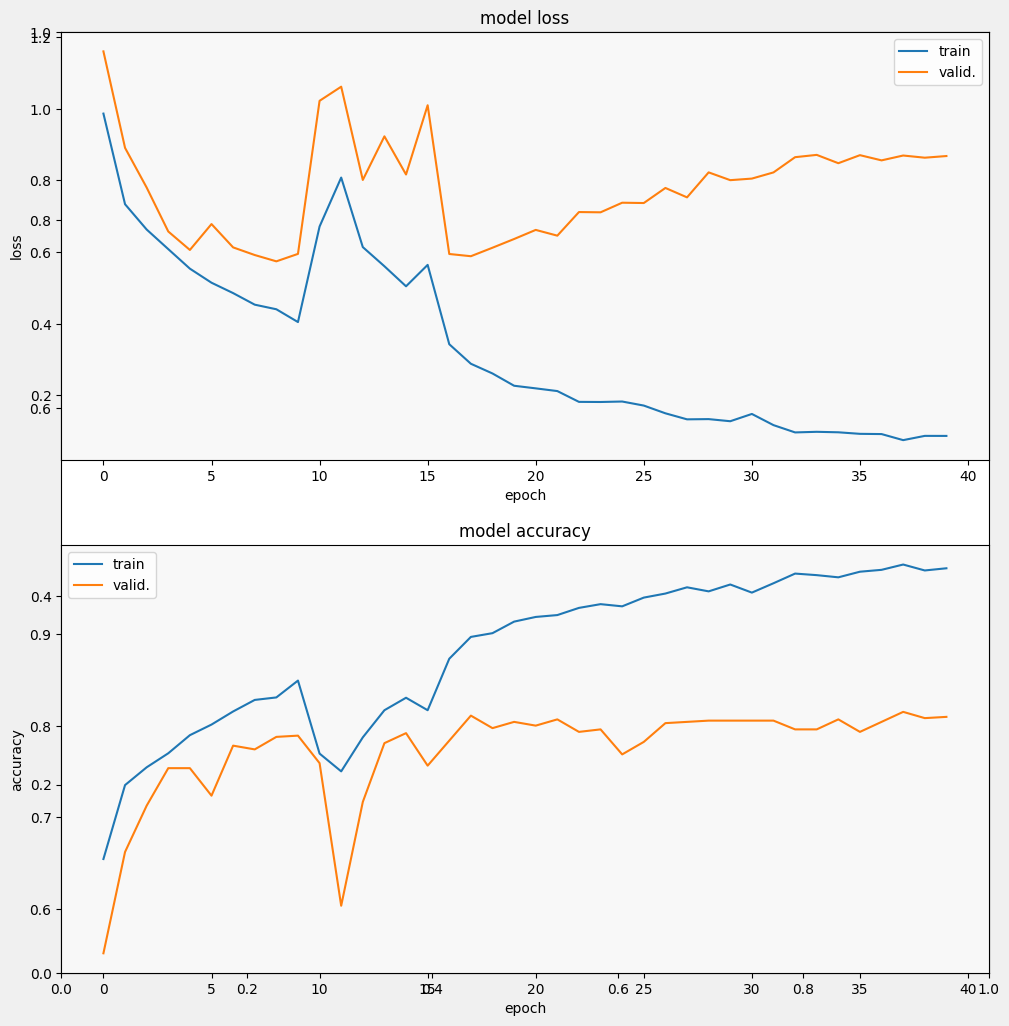

In [ ]:
display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'loss', 211)
display_training_curves(
    history.history['acc'],
    history.history['val_acc'],
    'accuracy', 212)

In [ ]:
# Save the model in TensorFlow's SavedModel format
model.save('my_diabetic_model_bell_graham.h5')  # or .h5 for HDF5 format

In [ ]:
model.save('my_diabetic_model_keras_bell_graham.keras')  # or .h5 for HDF5 format

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/my_diabetic_model_keras_bell_graham.keras')  # Use your saved model path

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 215 variables whereas the saved optimizer has 428 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np



def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Match training rescaling
    img_array = np.expand_dims(img_array, axis=0)  # Create batch dimension
    return img_array

img_path = '/content/498f143c0374.png'
processed_img = preprocess_image(img_path)


In [ ]:
prediction = model.predict(processed_img)

# Get class with highest probability
predicted_class = np.argmax(prediction)
confidence = np.max(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [ ]:
class_indices = train_data.class_indices
class_names = {v: k for k, v in class_indices.items()}

# For single prediction
print(f"Predicted: {class_names[predicted_class]}, Confidence: {confidence:.2f}")

Predicted: Moderate, Confidence: 0.48


In [ ]:
# Training accuracy per epoch
train_acc = history.history['acc']

# Validation accuracy per epoch
val_acc = history.history['val_acc']

print(f"Final Training Accuracy: {train_acc[-1]:.4f}")
print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")

Final Training Accuracy: 0.9724
Final Validation Accuracy: 0.8098
